<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumApplicationAlgorithm_VQA_QAOA(TSP4x4_DWaveAnnealer_mkbahk_20260206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install dwave-ocean-sdk==9.3.0
#%pip install dwave-networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00


In [14]:
import networkx as nx
import dwave_networkx as dnx

#from neal import SimulatedAnnealingSampler
from dimod import SimulatedAnnealingSampler # Changed import from neal to dimod
import numpy as np

In [15]:
# 1. 4x4 거리 행렬(Distance Matrix) 샘플 생성
# (0, 1, 2, 3번 도시 사이의 거리)
"""
distance_matrix = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
"""

'\ndistance_matrix = [\n    [0, 10, 15, 20],\n    [10, 0, 35, 25],\n    [15, 35, 0, 30],\n    [20, 25, 30, 0]\n]\n'

In [16]:
#
#대한민국의 모든 시도청을 가장 짦은 경로로 여행하고 싶다.
#
# 17개 도시 목록 (인덱스 순서), 거리단위는 Km
# 0:서울, 1:인천, 2:경기(수원), 3:강원(춘천), 4:충북(청주), 5:충남(홍성), 6:세종, 7:대전,
# 8:전북(전주), 9:전남(무안), 10:경북(안동), 11:경남(창원), 12:제주, 13:부산, 14:울산, 15:대구, 16:광주

distance_matrix = np.array([
    [  0,  32,  35, 105, 135, 130, 132, 160, 210, 340, 235, 350, 450, 390, 375, 285, 290],   # 0: 서울
    [ 32,   0,  42, 135, 145, 105, 140, 165, 205, 330, 255, 355, 445, 400, 385, 300, 285],   # 1: 인천
    [ 35,  42,   0, 120, 105,  95, 105, 130, 175, 305, 215, 320, 415, 365, 350, 265, 260],    # 2: 경기
    [105, 135, 120,   0, 170, 225, 195, 215, 305, 430, 230, 390, 540, 415, 370, 290, 385],  # 3: 강원
    [135, 145, 105, 170,   0,  90,  35,  45, 110, 245, 130, 240, 360, 285, 270, 180, 195],    # 4: 충북
    [130, 105,  95, 225,  90,   0,  75,  90, 105, 230, 225, 285, 345, 335, 330, 245, 185],     # 5: 충남
    [132, 140, 105, 195,  35,  75,   0,  25,  95, 230, 155, 245, 345, 290, 280, 190, 180],     # 6: 세종
    [160, 165, 130, 215,  45,  90,  25,   0,  85, 215, 150, 230, 330, 265, 255, 165, 165],     # 7: 대전
    [210, 205, 175, 305, 110, 105,  95,  85,   0, 135, 215, 205, 255, 260, 265, 195,  90],    # 8: 전북
    [340, 330, 305, 430, 245, 230, 230, 215, 135,   0, 345, 260, 180, 305, 330, 290,  65],   # 9: 전남
    [235, 255, 215, 230, 130, 225, 155, 150, 215, 345,   0, 185, 435, 165, 145, 105, 280],  # 10: 경북
    [350, 355, 320, 390, 240, 285, 245, 230, 205, 260, 185,   0, 280,  45,  70, 100, 210],    # 11: 경남
    [450, 445, 415, 540, 360, 345, 345, 330, 255, 180, 435, 280,   0, 310, 340, 380, 240],  # 12: 제주
    [390, 400, 365, 415, 285, 335, 290, 265, 260, 305, 165,  45, 310,   0,  55, 115, 255],    # 13: 부산
    [375, 385, 350, 370, 270, 330, 280, 255, 265, 330, 145,  70, 340,  55,   0,  95, 280],     # 14: 울산
    [285, 300, 265, 290, 180, 245, 190, 165, 195, 290, 105, 100, 380, 115,  95,   0, 205],   # 15: 대구
    [290, 285, 260, 385, 195, 185, 180, 165,  90,  65, 280, 210, 240, 255, 280, 205,   0]     # 16: 광주
])

print(f"Matrix Shape: {distance_matrix.shape}")

Matrix Shape: (17, 17)


In [17]:
# 2. NetworkX 그래프 객체 생성
G = nx.Graph()
num_cities = len(distance_matrix)

for i in range(num_cities):
    for j in range(i + 1, num_cities):
        # 도시 i와 j 사이에 거리를 가중치(weight)로 추가
        G.add_edge(i, j, weight=distance_matrix[i][j])
    ###for
###for

In [18]:
# 3. 샘플러(Sampler) 설정
# D-Wave QPU 실제 장비 대신 로컬 시뮬레이터(SimulatedAnnealingSampler)를 사용합니다.
sampler = SimulatedAnnealingSampler()

In [19]:
# 4. TSP 문제 해결 (dwave-networkx 활용)
# 이 함수는 내부적으로 TSP를 QUBO(Quadratic Unconstrained Binary Optimization) 형태로 변환하여 샘플링합니다.
best_path = dnx.traveling_salesperson(G, sampler, weight='weight')

In [ ]:
# `dnx.traveling_salesperson` 함수는 내부적으로 TSP 문제를 BQM(Binary Quadratic Model)로 변환하여 샘플러에 전달합니다.
# `dimod.SimulatedAnnealingSampler`는 각 샘플링 단계에서 콜백을 제공하지 않으며, 최종적인 SampleSet을 반환합니다.
# 따라서 `dnx.traveling_salesperson` 함수는 계산 과정의 히스토리를 직접 볼 수 있는 콜백 함수를 제공하지 않습니다.

In [20]:
# 5. 결과 출력
print("--- TSP 최적 경로 계산 결과 ---")
if best_path:
    print(f"최적 경로: {best_path}")

    # 총 이동 거리 계산
    total_distance = 0
    for k in range(len(best_path) - 1):
        total_distance += distance_matrix[best_path[k]][best_path[k+1]]
    ###for
    # 마지막 도시에서 시작 도시로 돌아오는 거리 추가
    total_distance += distance_matrix[best_path[-1]][best_path[0]]

    print(f"총 이동 거리: {total_distance}")
else:
    print("경로를 찾지 못했습니다.")
###if

--- TSP 최적 경로 계산 결과 ---
최적 경로: [0, 10, 14, 11, 1, 6, 5, 4, 2, 16, 12, 9, 15, 7, 3, 13, 8]
총 이동 거리: 3450


DWave 양자컴퓨터에서 TSP풀때 최대능력치: https://grok.com/share/bGVnYWN5LWNvcHk_3ac5507f-09dc-4bf5-893a-c3d917c91906

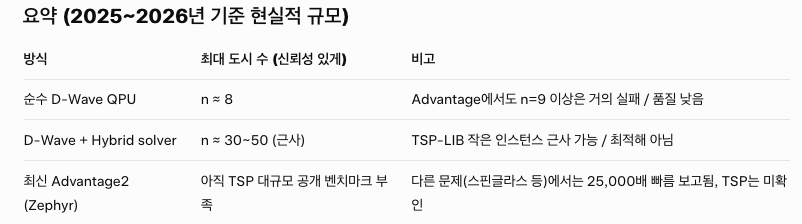